# CNN for Classification: Cats vs. Dogs

![catvsdog](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*qejv1I-FYujIjqev.jpg)

dataset source: https://www.microsoft.com/en-us/download/details.aspx?id=54765


In [1]:
from typing import List

path = "../data/PetImages"

In [2]:
import os
import shutil

# Move and organise data
def create_dataset_directories(base_dir: str) -> None:
    print("Start creation of dataset directories...")

    if not os.path.exists(base_dir):
        os.mkdir(base_dir)

    directories = ["train", "validation", "test"]
    for directory in directories:
        sub_dir = os.path.join(base_dir, directory)
        os.mkdir(sub_dir)
        os.mkdir(os.path.join(sub_dir, "cats"))
        os.mkdir(os.path.join(sub_dir, "dogs"))

    print("Done")


def copy_data(
    src: str, dst: str, example_name: str, fnames: List[str]
) -> None:
    print("Copying...")
    for fname in fnames:
        print(f"Copying {fname} to {dst}")
        shutil.copyfile(
            os.path.join(src, fname),
            os.path.join(dst, example_name + "." + fname)
        )


In [3]:
import re
fnames_cats = [f for f in os.listdir(path + "/Cat") if re.match(r'[0-9]+.*\.jpg', f)]
fnames_dogs = [f for f in os.listdir(path + "/Dog") if re.match(r'[0-9]+.*\.jpg', f)]

In [4]:
len(fnames_dogs)

12500

In [5]:
12500*0.8

10000.0

In [6]:
train_fnames_cats = fnames_cats[:8000]
val_fnames_cats = fnames_cats[8000:10000]
test_fnames_cats = fnames_cats[10000:]

train_fnames_dogs = fnames_dogs[:8000]
val_fnames_dogs = fnames_dogs[8000:10000]
test_fnames_dogs = fnames_dogs[10000:]

In [7]:
destination = "../data/PetImages/cats_vs_dogs"

In [8]:
# Check if the directory exists
if os.path.exists(destination):
    shutil.rmtree(destination)
    create_dataset_directories(destination)
else:
    create_dataset_directories(destination)

copy_data(path + "/Cat", f"{destination}/train/cats/", "cat", train_fnames_cats)
copy_data(path + "/Dog", f"{destination}/train/dogs/", "dog", train_fnames_dogs)

copy_data(path + "/Cat", f"{destination}/validation/cats/", "cat", val_fnames_cats)
copy_data(path + "/Dog", f"{destination}/validation/dogs/", "dog", val_fnames_dogs)

copy_data(path + "/Cat", f"{destination}/test/cats/", "cat", test_fnames_cats)
copy_data(path + "/Dog", f"{destination}/test/dogs/", "dog", test_fnames_dogs)


Start creation of dataset directories...
Done
Copying...
Copying 9733.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 63.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 6400.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 823.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 4217.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 3578.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 10321.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 2666.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 5109.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 11981.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 10447.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 2100.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 11759.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 4571.jpg to ../data/PetImages/cats_vs_dogs/train/cats/
Copying 7078.jpg to ../data/PetImages/cats_vs_dogs/train/cat

## Remove corrupted images

In [9]:
import shutil
import os
import time
from PIL import Image

# Method 1
def extract_corrupt_img_files(dir_path):
  """
  Gets corrupted image files within a directory
  
    Arguments:
        dir_path: a string representing the path for the target directory

    Returns:
        a list of the paths for the corrupted image files

  """ 
  i = 0
  beg = time.time()
  corrupted = []
  for filename in os.listdir(dir_path):
    i +=1
    if i % 50 == 0:
      print(i, end =" ")
    if i % 1000 == 0:
      print()
    try:
        Image.open(dir_path + '/' + filename)
    except:
      corrupted.append(filename)
      os.remove(dir_path + '/' + filename)
      continue

  end = time.time()
  print()
  print('*' * 50) 
  print("\nTASK FINISHED IN " + str(end - beg) + " seconds ")
  print("{} corrupted files found and removed in {}".format(len(corrupted), dir_path))
  print('*' * 50) 
  return corrupted

extract_corrupt_img_files(f"{destination}/test/cats/")

50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 
1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 
2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 
**************************************************

TASK FINISHED IN 0.3518509864807129 seconds 
0 corrupted files found and removed in ../data/PetImages/cats_vs_dogs/test/cats/
**************************************************


[]

In [10]:
from pathlib import Path
import imghdr

# Method 2

data_dir = f"{destination}/test/dogs/"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image and will be removed")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow and will be removed")
            os.remove(filepath)


../data/PetImages/cats_vs_dogs/test/dogs/dog.7729.jpg is not an image and will be removed


In [11]:
from pathlib import Path
import tensorflow as tf

import imghdr
test_dir = f"{destination}/test/"
validation_dir=f"{destination}/validation/"

# Method 3

img_link=list(Path(validation_dir).glob(r'**/*.jpg'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

Total 294 pcs image delete from Dataset


In [12]:
import glob
import tensorflow as tf
# Method 4

img_paths = glob.glob(os.path.join(f"{destination}/train/",'*/*.*')) # assuming you point to the directory containing the label folders.

bad_paths = []

for image_path in img_paths:
    try:
      img_bytes = tf.io.read_file(image_path)
      decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
      print(f"Found bad path {image_path}...{e}")
      bad_paths.append(image_path)
      os.remove(image_path)
    
    #print(f"{image_path}: OK")

print("BAD PATHS (removed):")
for bad_path in bad_paths:
    print(f"{bad_path}")

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Found bad path ../data/PetImages/cats_vs_dogs/train/dogs/dog.11702.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] name: 
Found bad path ../data/PetImages/cats_vs_dogs/train/dogs/dog.2317.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 


Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


Found bad path ../data/PetImages/cats_vs_dogs/train/dogs/dog.11912.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Found bad path ../data/PetImages/cats_vs_dogs/train/cats/cat.666.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] name: 


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Found bad path ../data/PetImages/cats_vs_dogs/train/cats/cat.10404.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
BAD PATHS (removed):
../data/PetImages/cats_vs_dogs/train/dogs/dog.11702.jpg
../data/PetImages/cats_vs_dogs/train/dogs/dog.2317.jpg
../data/PetImages/cats_vs_dogs/train/dogs/dog.11912.jpg
../data/PetImages/cats_vs_dogs/train/cats/cat.666.jpg
../data/PetImages/cats_vs_dogs/train/cats/cat.10404.jpg


### Build your model

In [13]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3)
    ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
from keras.preprocessing.image import ImageDataGenerator
# process the data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = f"{destination}/train/"
validation_dir = f"{destination}/validation/"

batch_size=32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"
)

Found 15995 images belonging to 2 classes.
Found 3706 images belonging to 2 classes.


In [16]:
14997 / batch_size

468.65625

In [17]:
epochs = 15
len(train_generator) // epochs

33

In [18]:
# model sees each data point once
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // epochs,  # len(train_generator)//epochs
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // epochs
)

Epoch 1/15
33/33 [==============================] - 9s 267ms/step - loss: 0.9119 - accuracy: 0.4744 - val_loss: 0.6937 - val_accuracy: 0.5089
Epoch 2/15
33/33 [==============================] - 8s 233ms/step - loss: 0.7603 - accuracy: 0.5208 - val_loss: 0.6909 - val_accuracy: 0.6071
Epoch 3/15
33/33 [==============================] - 8s 233ms/step - loss: 0.7268 - accuracy: 0.5502 - val_loss: 0.6822 - val_accuracy: 0.5893
Epoch 4/15
33/33 [==============================] - 8s 232ms/step - loss: 0.7006 - accuracy: 0.5568 - val_loss: 0.7014 - val_accuracy: 0.4866
Epoch 5/15
 3/33 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5208

/Users/vokur/anaconda3/envs/python_data/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


33/33 [==============================] - 8s 235ms/step - loss: 0.6750 - accuracy: 0.5975 - val_loss: 0.7448 - val_accuracy: 0.5268
Epoch 6/15
33/33 [==============================] - 8s 230ms/step - loss: 0.6955 - accuracy: 0.6203 - val_loss: 0.6701 - val_accuracy: 0.5848
Epoch 7/15
33/33 [==============================] - 9s 265ms/step - loss: 0.6617 - accuracy: 0.6373 - val_loss: 0.6357 - val_accuracy: 0.6295
Epoch 8/15
33/33 [==============================] - 9s 258ms/step - loss: 0.6214 - accuracy: 0.6468 - val_loss: 0.5942 - val_accuracy: 0.6741
Epoch 9/15
33/33 [==============================] - 8s 231ms/step - loss: 0.6342 - accuracy: 0.6638 - val_loss: 0.5569 - val_accuracy: 0.6875
Epoch 10/15
33/33 [==============================] - 8s 231ms/step - loss: 0.6523 - accuracy: 0.6591 - val_loss: 0.5837 - val_accuracy: 0.7009
Epoch 11/15
33/33 [==============================] - 8s 231ms/step - loss: 0.6005 - accuracy: 0.6828 - val_loss: 0.5648 - val_accuracy: 0.7054
Epoch 12/15
33/

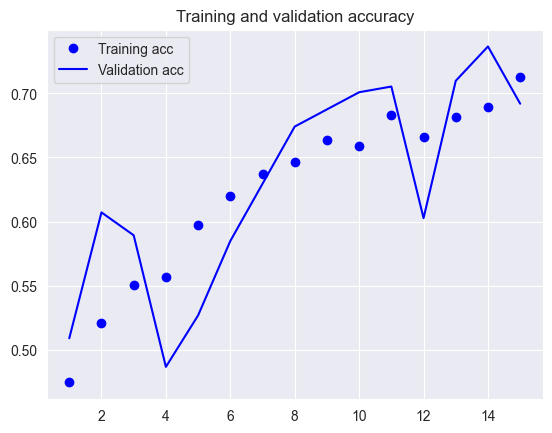

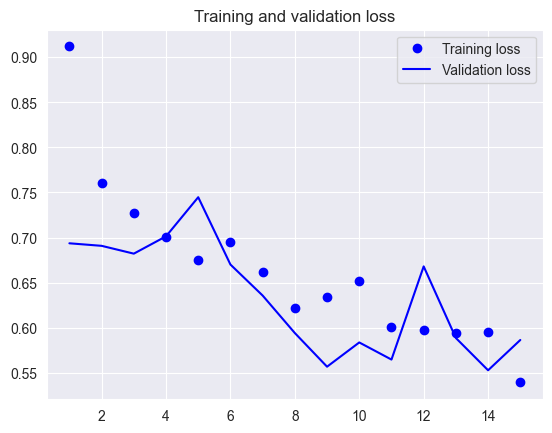

In [19]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

## Data Augmentation

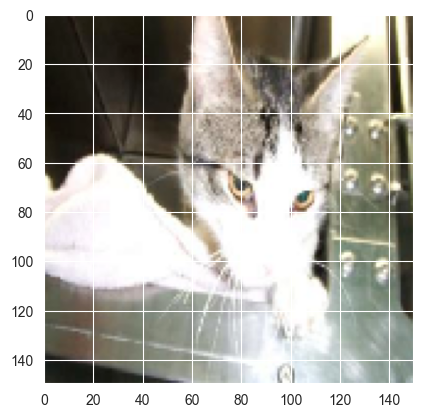

In [21]:
# deprecated
import os

import matplotlib.pyplot as plt

from more_itertools import take
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_cats_dir = f"{destination}/train/cats/"

fnames = [
    os.path.join(train_cats_dir, fname)
    for fname in os.listdir(train_cats_dir)
]

img_path = fnames[92]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(image.array_to_img(x[0]))

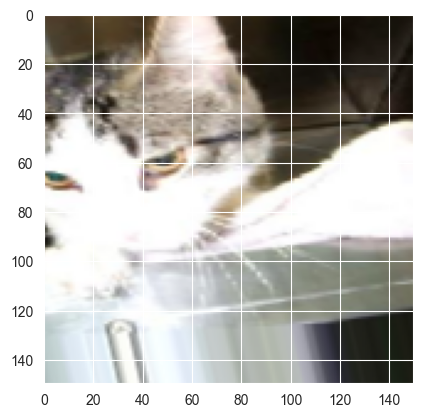

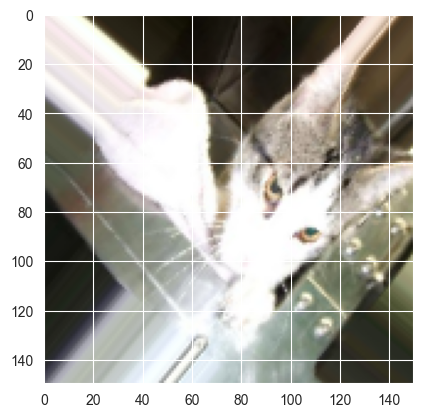

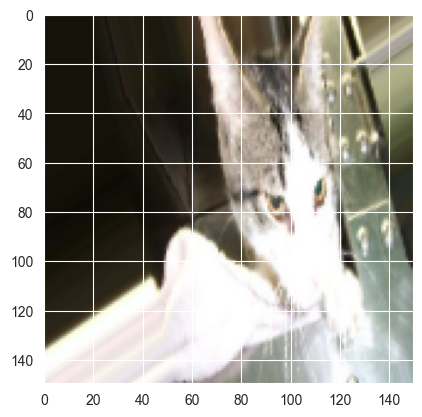

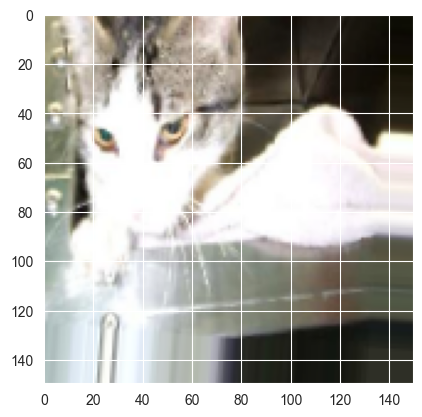

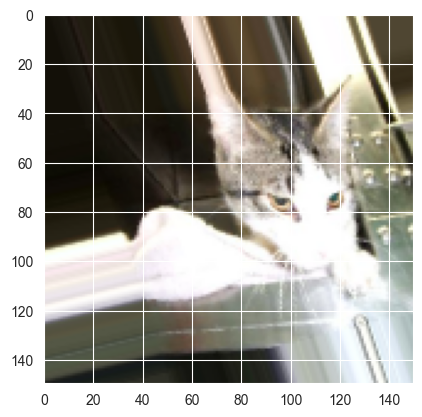

In [22]:
for batch in take(5, datagen.flow(x, batch_size=1)):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))

plt.show()

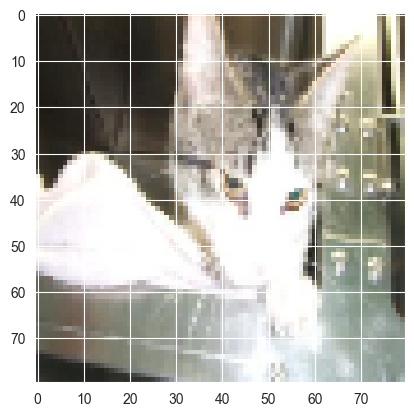

In [25]:
# keras preprocessing layers
import tensorflow as tf

IMG_SIZE = 80

# You can use the Keras preprocessing layers to resize your images to a consistent shape 
# (with tf.keras.layers.Resizing), and to rescale pixel values (with tf.keras.layers.Rescaling)

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize_and_rescale(x)
_ = plt.imshow(result[0])

In [26]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.06753983 1.0


In [27]:
# You can use the Keras preprocessing layers for data augmentation as well, 
# such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation.

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [28]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(result[0], 0), tf.float32)

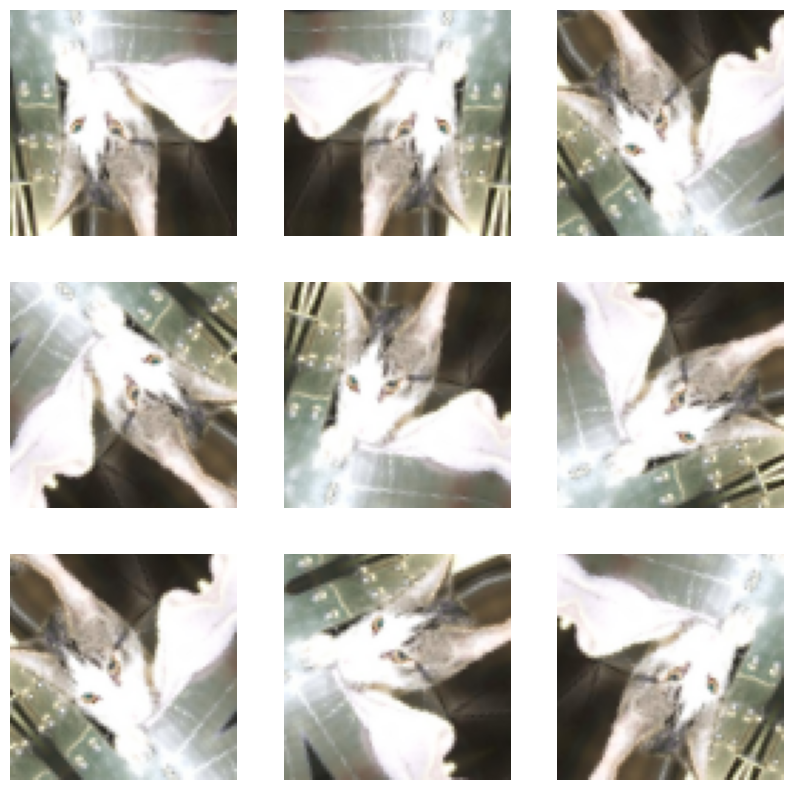

In [29]:
# https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [30]:
# add the preprocessing layers to the model

#There are two important points to be aware of in this case:

# 1. Data augmentation will run on-device, synchronously with the rest of your layers, and benefit from GPU acceleration.
# 2. When you export your model using model.save, the preprocessing layers will be saved along with the rest of your model. 
# If you later deploy this model, it will automatically standardize images (according to the configuration of your layers). 
# This can save you from the effort of having to reimplement that logic server-side.


# You will see some improvement in accuracy if you remove the RandomFlip and RandomRotation layers 
# because you make the problem easier. However, as you want the network to predict well on a wide variation 
# of image quality and properties, using augmentation can help your resulting network become more powerful.

# https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/

model_augmented = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3)
    ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

model_augmented.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


In [31]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=batch_size,
    color_mode="rgb"
)
#train_data = train_data.repeat(2)

validation_data = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150,150),
    batch_size=batch_size,
    color_mode="rgb"
)


Found 15995 files belonging to 2 classes.
Found 3706 files belonging to 2 classes.


In [32]:
type(train_data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [33]:
# train_data.file_paths
train_data.class_names

['cats', 'dogs']

In [34]:
epochs = 15
history = model_augmented.fit(
    train_data,
    steps_per_epoch=len(train_data)//epochs,
    epochs=epochs,
    validation_data=validation_data
)

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 0.7327 - accuracy: 0.5019

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 152ms/step - loss: 0.7327 - accuracy: 0.5019 - val_loss: 0.6963 - val_accuracy: 0.5008
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.5085

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 148ms/step - loss: 0.7009 - accuracy: 0.5085 - val_loss: 0.6970 - val_accuracy: 0.4992
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5199

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 6s 173ms/step - loss: 0.6918 - accuracy: 0.5199 - val_loss: 0.6829 - val_accuracy: 0.5613
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5369

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 145ms/step - loss: 0.6941 - accuracy: 0.5369 - val_loss: 0.6871 - val_accuracy: 0.5418
Epoch 5/15
33/33 [==============================] - ETA: 0s - loss: 0.7043 - accuracy: 0.5720

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 143ms/step - loss: 0.7043 - accuracy: 0.5720 - val_loss: 0.6795 - val_accuracy: 0.5631
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5407

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 143ms/step - loss: 0.6916 - accuracy: 0.5407 - val_loss: 0.6841 - val_accuracy: 0.5011
Epoch 7/15
27/33 [=======================>......] - ETA: 0s - loss: 0.6859 - accuracy: 0.5532

33/33 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5464

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 143ms/step - loss: 0.6860 - accuracy: 0.5464 - val_loss: 0.6874 - val_accuracy: 0.4997
Epoch 8/15
33/33 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.5682

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 140ms/step - loss: 0.6811 - accuracy: 0.5682 - val_loss: 0.6751 - val_accuracy: 0.5756
Epoch 9/15
33/33 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5672

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 168ms/step - loss: 0.6893 - accuracy: 0.5672 - val_loss: 0.6629 - val_accuracy: 0.6120
Epoch 10/15
14/33 [===========>..................] - ETA: 1s - loss: 0.6772 - accuracy: 0.5871

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


23/33 [===================>..........] - ETA: 0s - loss: 0.6831 - accuracy: 0.5978

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


33/33 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.5956

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 160ms/step - loss: 0.6794 - accuracy: 0.5956 - val_loss: 0.6603 - val_accuracy: 0.6058
Epoch 11/15
33/33 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.5928

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 146ms/step - loss: 0.6747 - accuracy: 0.5928 - val_loss: 0.6661 - val_accuracy: 0.5998
Epoch 12/15
33/33 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.6042

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 164ms/step - loss: 0.6748 - accuracy: 0.6042 - val_loss: 0.6458 - val_accuracy: 0.6233
Epoch 13/15
33/33 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.6108

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 141ms/step - loss: 0.6692 - accuracy: 0.6108 - val_loss: 0.6502 - val_accuracy: 0.6274
Epoch 14/15
33/33 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.6544

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 6s 185ms/step - loss: 0.6439 - accuracy: 0.6544 - val_loss: 0.6471 - val_accuracy: 0.6228
Epoch 15/15
33/33 [==============================] - ETA: 0s - loss: 0.6494 - accuracy: 0.6184

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 5s 148ms/step - loss: 0.6494 - accuracy: 0.6184 - val_loss: 0.7065 - val_accuracy: 0.5747


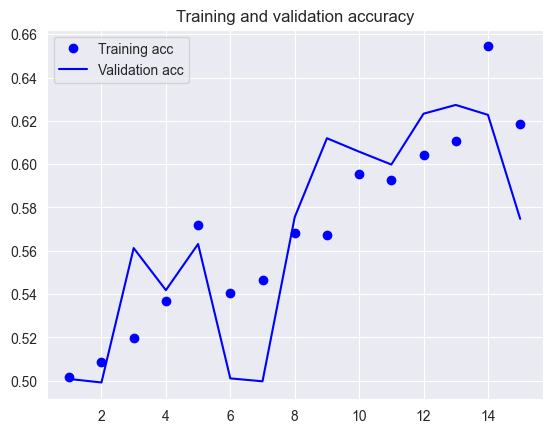

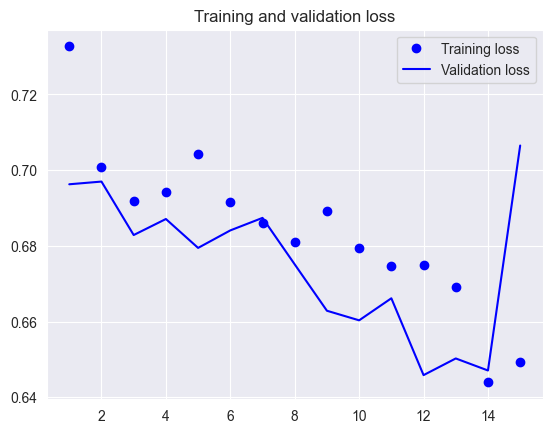

In [35]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [36]:
test_dir = f"{destination}/test/"
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150,150),
    batch_size=batch_size,
    color_mode="rgb"
)

Found 4999 files belonging to 2 classes.


In [37]:
model.evaluate(test_data)

 15/157 [=>............................] - ETA: 10s - loss: 26.1515 - accuracy: 0.6792

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 37/157 [======>.......................] - ETA: 8s - loss: 25.1784 - accuracy: 0.6850

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_66706]

In [38]:
model_augmented.evaluate(test_data)

 19/157 [==>...........................] - ETA: 3s - loss: 0.6791 - accuracy: 0.6053

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 37/157 [======>.......................] - ETA: 3s - loss: 0.6835 - accuracy: 0.5980

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_57176]

In [39]:
# data loading and preprocessing must be the same as in training!
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"
)
model.evaluate(test_generator)

Found 4999 images belonging to 2 classes.
157/157 [==============================] - 11s 70ms/step - loss: 0.5798 - accuracy: 0.7147


[0.5797755718231201, 0.7147429585456848]

1/1 [==============================] - 0s 7ms/step


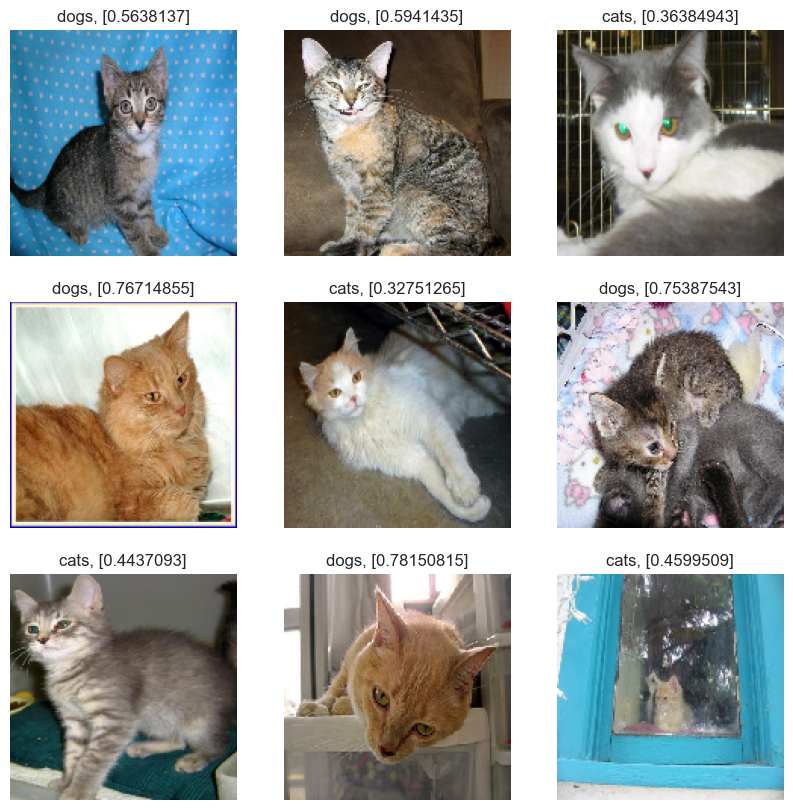

In [42]:
from keras.preprocessing import image

fnames = [
    os.path.join(test_dir + "/cats", fname)
    for fname in os.listdir(test_dir + "/cats")
]

plt.figure(figsize=(10, 10))
for i in range(9):
  img_path = fnames[i]
  img = image.load_img(img_path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.array_to_img(x[0]))
  prediction = model_augmented.predict(x)[0]
  predicted_lable = test_data.class_names[1] if prediction > 0.5 else test_data.class_names[0]
  plt.title(f"{predicted_lable}, {prediction}")
  plt.axis("off")


In [43]:
# Create a confusion_matrix
import numpy as np

predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
  prediction=model_augmented.predict(x) 
  classes_x=tf.constant((prediction > 0.5).astype("int32").reshape(1, -1)[0])
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, y])

print(len(labels))
print(len(predictions))
confusion_martix = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
confusion_martix

1/1 [==============================] - 0s 27ms/step


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


1/1 [==============================] - 0s 23ms/step


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

tf.Tensor(
[[157 440]
 [ 43 544]], shape=(2, 2), dtype=int32)


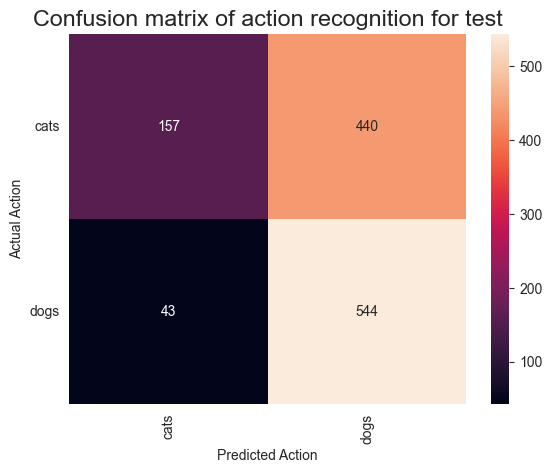

In [44]:
import seaborn as sns
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  print(cm)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(6, 6)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

plot_confusion_matrix(labels, predictions, test_data.class_names, 'test')

# ResNet (Residual Neural Network) 
Deeper networks are harder to optimize. With each extra layer that we add to a network, we add more difficulty in the process of training; it becomes harder for the optimization algorithm that we use to find the right parameters. As we add more layers, the network gets better results until at some point; then as we continue to add extra layers, the accuracy starts to drop.

https://www.neuralception.com/objectdetection-batchnorm/#residual-networks


![resnet](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*cIKFeG7ZIl9D-VnSF0KAZA.png)
https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

**How does the information flow through the skip connection?**
The skip connections, also known as shortcut connections, are active during both the forward pass and the backward pass (during backpropagation) in a ResNet architecture.

- During the forward pass:

The input data passes through the convolutional layers within a residual block.
Simultaneously, the input data also flows through the skip connection, which directly connects the input of the residual block to its output.

- During the backward pass (during backpropagation):

Gradients are computed with respect to the loss function and propagated backward through the network.
The gradients flow through both the convolutional layers and the skip connections.
The gradients that flow through the skip connections help alleviate the vanishing gradient problem by providing a direct path for gradient flow from the output to the input of the residual block.
By maintaining the skip connections throughout both the forward and backward passes, ResNet architectures enable easier optimization of deep networks and facilitate the training of very deep architectures effectively.


**Why use ResNet and not just simplify the network?**

- ResNets use skip connections to **preserve information flow** throughout the network. By directly connecting earlier layers to later layers, ResNets mitigate the risk of information loss or distortion as it passes through multiple layers. Simply removing layers doesn't address this issue.
- Removing layers without considering the network architecture can lead to degradation in performance as the depth increases. ResNets, on the other hand, **ensure that gradients can flow freely through the network**, making it easier to train deep architectures without suffering from vanishing gradients.
- The skip connections in ResNets enable feature reuse, allowing **earlier layers to directly contribute to the output of deeper layers**. This can be beneficial for tasks where certain low-level features are relevant across different parts of the network. 

Epoch 1/10
25/25 [==============================] - 0s 10ms/step - loss: 2.3103 - accuracy: 0.1088 - val_loss: 2.3108 - val_accuracy: 0.0900
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 2.2827 - accuracy: 0.1250 - val_loss: 2.3296 - val_accuracy: 0.0900
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 2.1540 - accuracy: 0.1587 - val_loss: 2.3523 - val_accuracy: 0.0950
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 1.9713 - accuracy: 0.2163 - val_loss: 2.4000 - val_accuracy: 0.0850
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 1.8750 - accuracy: 0.2375 - val_loss: 2.7243 - val_accuracy: 0.1250
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 1.7502 - accuracy: 0.2438 - val_loss: 2.6153 - val_accuracy: 0.1350
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 1.6544 - accuracy: 0.3075 - val_loss: 3.0526 - val_accuracy: 0.0650
Epoch 8/10
25/25 [=

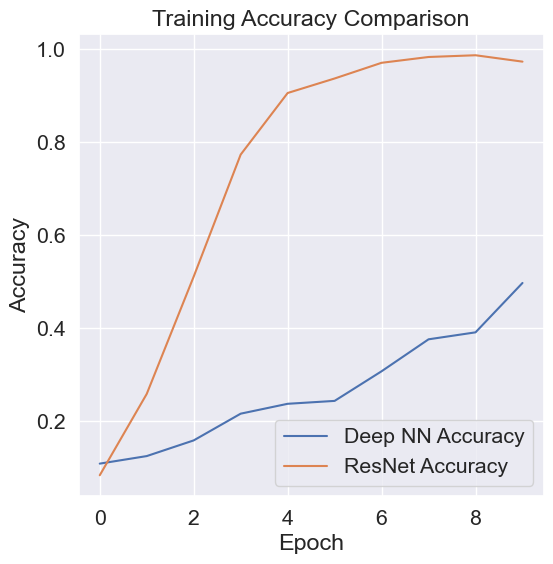

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple deep neural network
# TODO: make it deeper
def build_deep_nn():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define a ResNet-like deep neural network
def build_resnet():
    input_layer = layers.Input(shape=(784,))
    x = layers.Dense(512, activation='relu')(input_layer)
    for _ in range(10):  # Adding 10 residual blocks
        residual = x  # residual = F(x) - x  # різниця
        # two stacked blocks
        x = layers.Dense(512, activation='relu')(x)
        x = layers.Dense(512, activation=None)(x)  # No activation after the second layer, https://stats.stackexchange.com/questions/623551/no-activation-function-between-two-convolutional-layers-in-munit
        x = layers.Add()([x, residual])  # Adding the shortcut connection
        x = layers.Activation('relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Generate synthetic data
num_samples = 1000
input_data = np.random.randn(num_samples, 784)
labels = np.random.randint(0, 10, size=(num_samples,))

# Build and compile the deep neural network
deep_nn = build_deep_nn()
deep_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the deep neural network
deep_nn_history = deep_nn.fit(input_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Build and compile the ResNet-like neural network
resnet = build_resnet()
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet-like neural network
resnet_history = resnet.fit(input_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
plt.plot(deep_nn_history.history['accuracy'], label='Deep NN Accuracy')
plt.plot(resnet_history.history['accuracy'], label='ResNet Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [46]:
from tensorflow.keras import layers, models

# Define the residual block
def residual_block(x, filters, kernel_size):
    shortcut = x
    
    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)  # https://www.neuralception.com/objectdetection-batchnorm/#:~:text=In%20summary%2C%20batch%20normalization%20is,normalization%20offers%20some%20regularization%20effect.
    x = layers.Activation('relu')(x)
    
    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Add the shortcut connection
    if shortcut.shape[-1] != filters:  # If number of channels is not equal, apply 1x1 convolution to match dimensions
        shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Build the model using residual layers
input_layer = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(32, (3, 3), activation="relu")(input_layer)
x = layers.MaxPooling2D((2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=64, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, filters=128, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, filters=128, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
output_layer = layers.Dense(1, activation="sigmoid")(x)

# Create model
model_res_net = models.Model(inputs=input_layer, outputs=output_layer)


In [47]:
model_res_net.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
# No checkpoints used here because they would result from training on part of the data

epochs = 15

history = model_res_net.fit(
    train_data,
    steps_per_epoch=len(train_data)//epochs,
    epochs=epochs,
    validation_data=validation_data,
)

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 77.8155 - accuracy: 0.5237

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 40s 1s/step - loss: 77.8155 - accuracy: 0.5237 - val_loss: 10.0325 - val_accuracy: 0.5011
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 3.5451 - accuracy: 0.5521

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 3.5451 - accuracy: 0.5521 - val_loss: 5.2026 - val_accuracy: 0.5105
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 1.2123 - accuracy: 0.5492

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 1.2123 - accuracy: 0.5492 - val_loss: 1.4780 - val_accuracy: 0.5051
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 1.1298 - accuracy: 0.5720

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 1.1298 - accuracy: 0.5720 - val_loss: 0.8163 - val_accuracy: 0.5931
Epoch 5/15
33/33 [==============================] - ETA: 0s - loss: 0.7775 - accuracy: 0.5909

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 0.7775 - accuracy: 0.5909 - val_loss: 0.6649 - val_accuracy: 0.6176
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.5644

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 41s 1s/step - loss: 0.9603 - accuracy: 0.5644 - val_loss: 0.7059 - val_accuracy: 0.5526
Epoch 7/15
24/33 [====================>.........] - ETA: 5s - loss: 0.7491 - accuracy: 0.6159

33/33 [==============================] - ETA: 0s - loss: 0.7261 - accuracy: 0.6042

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 41s 1s/step - loss: 0.7261 - accuracy: 0.6042 - val_loss: 0.6585 - val_accuracy: 0.5850
Epoch 8/15
33/33 [==============================] - ETA: 0s - loss: 0.7795 - accuracy: 0.5653

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 38s 1s/step - loss: 0.7795 - accuracy: 0.5653 - val_loss: 0.6917 - val_accuracy: 0.5523
Epoch 9/15
31/33 [===========================>..] - ETA: 1s - loss: 0.8180 - accuracy: 0.5524

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


33/33 [==============================] - ETA: 0s - loss: 0.8068 - accuracy: 0.5540

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 40s 1s/step - loss: 0.8068 - accuracy: 0.5540 - val_loss: 0.6747 - val_accuracy: 0.5901
Epoch 10/15
12/33 [=========>....................] - ETA: 12s - loss: 0.6537 - accuracy: 0.6068

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


21/33 [==================>...........] - ETA: 7s - loss: 0.7132 - accuracy: 0.5804

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


33/33 [==============================] - ETA: 0s - loss: 0.7175 - accuracy: 0.5852

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 0.7175 - accuracy: 0.5852 - val_loss: 0.7974 - val_accuracy: 0.5944
Epoch 11/15
33/33 [==============================] - ETA: 0s - loss: 0.7185 - accuracy: 0.6051

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 0.7185 - accuracy: 0.6051 - val_loss: 0.7592 - val_accuracy: 0.5772
Epoch 12/15
32/33 [============================>.] - ETA: 0s - loss: 0.7295 - accuracy: 0.5938

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


33/33 [==============================] - ETA: 0s - loss: 0.7236 - accuracy: 0.5985

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 40s 1s/step - loss: 0.7236 - accuracy: 0.5985 - val_loss: 0.6253 - val_accuracy: 0.6398
Epoch 13/15
33/33 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.6449

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 40s 1s/step - loss: 0.6851 - accuracy: 0.6449 - val_loss: 0.6491 - val_accuracy: 0.6125
Epoch 14/15
33/33 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.6278

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 0.6889 - accuracy: 0.6278 - val_loss: 0.6537 - val_accuracy: 0.6409
Epoch 15/15
33/33 [==============================] - ETA: 0s - loss: 0.7493 - accuracy: 0.5985

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


33/33 [==============================] - 39s 1s/step - loss: 0.7493 - accuracy: 0.5985 - val_loss: 0.6528 - val_accuracy: 0.6239


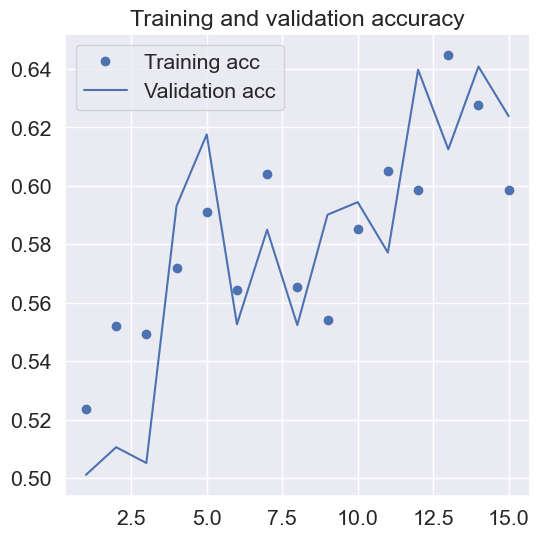

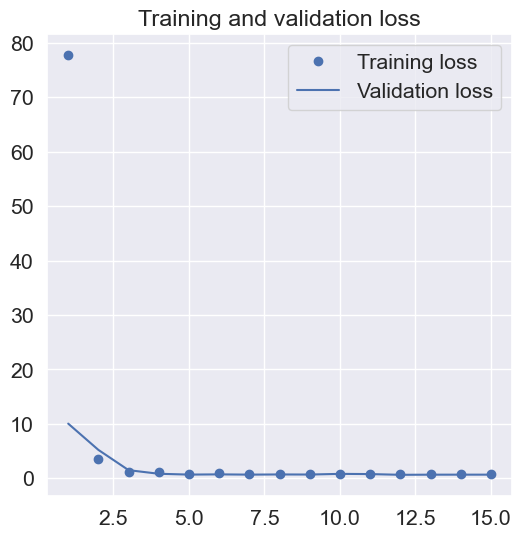

In [49]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [50]:
model_res_net.save("res_net.keras")

In [51]:
model_res_net.evaluate(test_data)

 14/157 [=>............................] - ETA: 28s - loss: 0.6253 - accuracy: 0.6518

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 37/157 [======>.......................] - ETA: 26s - loss: 0.6437 - accuracy: 0.6436

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_84587]

ResNet Versions:
https://medium.com/mlearning-ai/a-quick-overview-of-resnet-models-f8ed277ae81e

# Pretrained models

In [52]:
from tensorflow.keras.models import load_model
model_res_net = load_model("res_net.keras")
model_res_net.layers

AttributeError: 'RMSprop' object has no attribute 'build'

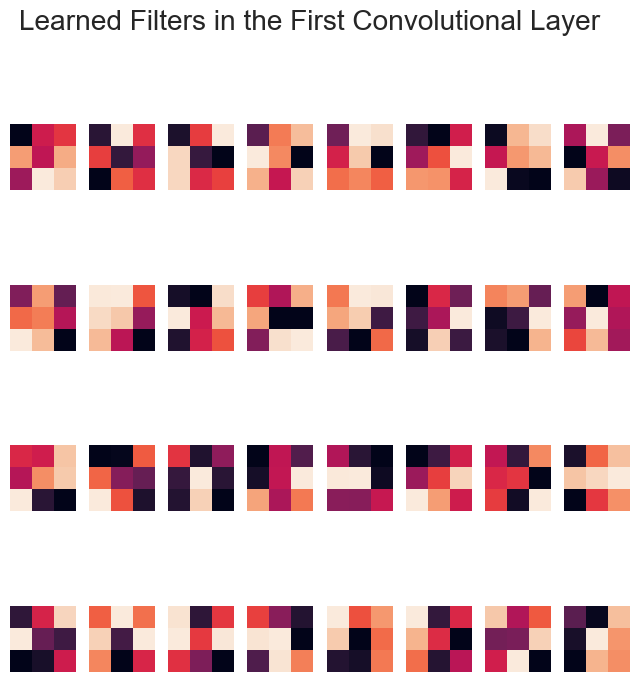

In [53]:
# Extract the filters from the first convolutional layer - feature extraction!
filters = model_res_net.layers[1].get_weights()[0]

# Visualize the learned filters
# Learned Filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix 
# of weights that slides over the input image, capturing different features.

plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis('off')
plt.suptitle('Learned Filters in the First Convolutional Layer')
plt.show()


In [54]:
from tensorflow.keras.applications import ResNet50
ResNet_50 = ResNet50(weights=None)
# parameter number: 
ResNet_50.count_params()

25636712

In [55]:
ResNet_50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

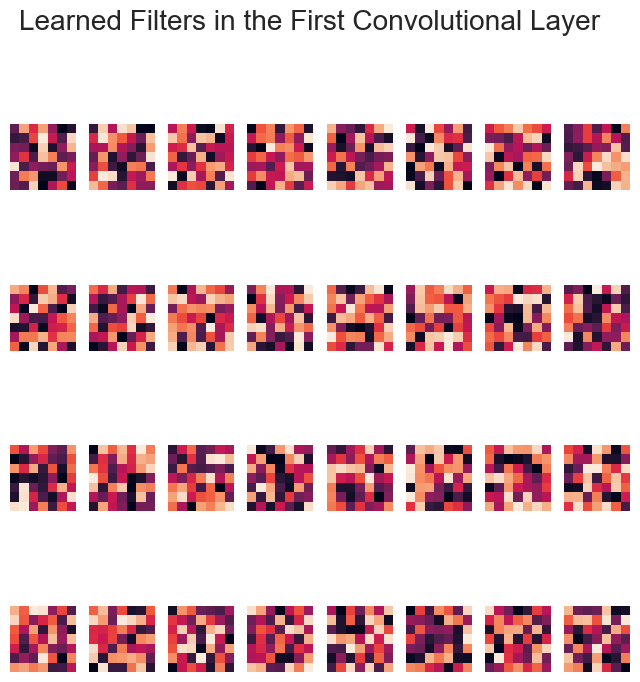

In [56]:
# Extract the filters from the first convolutional layer
filters = ResNet_50.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned Filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix 
# of weights that slides over the input image, capturing different features.

plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis('off')
plt.suptitle('Learned Filters in the First Convolutional Layer')
plt.show()

In [57]:
# Pretrained model on ImageNet https://www.image-net.org
# https://paperswithcode.com/dataset/imagenet
# based on https://wordnet.princeton.edu
# The most highly-used subset of ImageNet is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset. 
# This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images and 100,000 test images.

from tensorflow import keras
pretrained_resnet50 = keras.applications.ResNet50(
    weights="imagenet",
    classes=1000,
    classifier_activation="softmax",
)

102967424/102967424 [==============================] - 5s 0us/step


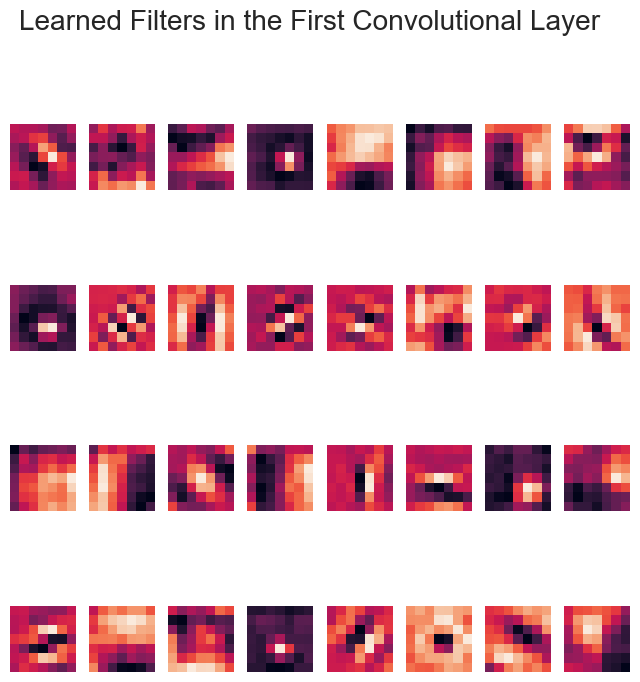

In [58]:
# Extract the filters from the first convolutional layer
filters = pretrained_resnet50.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned Filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix 
# of weights that slides over the input image, capturing different features.

plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis('off')
plt.suptitle('Learned Filters in the First Convolutional Layer')
plt.show()

https://en.wikipedia.org/wiki/Zero-shot_learning

In [59]:
import json
from urllib import request

# Download the label mapping file
url = "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"
response = request.urlopen(url)
data = json.loads(response.read())

# Create a dictionary to map class indices to labels
label_mapping = {int(idx): label for idx, (_, label) in data.items()}

# Print the label mapping
print(label_mapping)


{0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 54: 'hogn

1/1 [==============================] - 0s 56ms/step


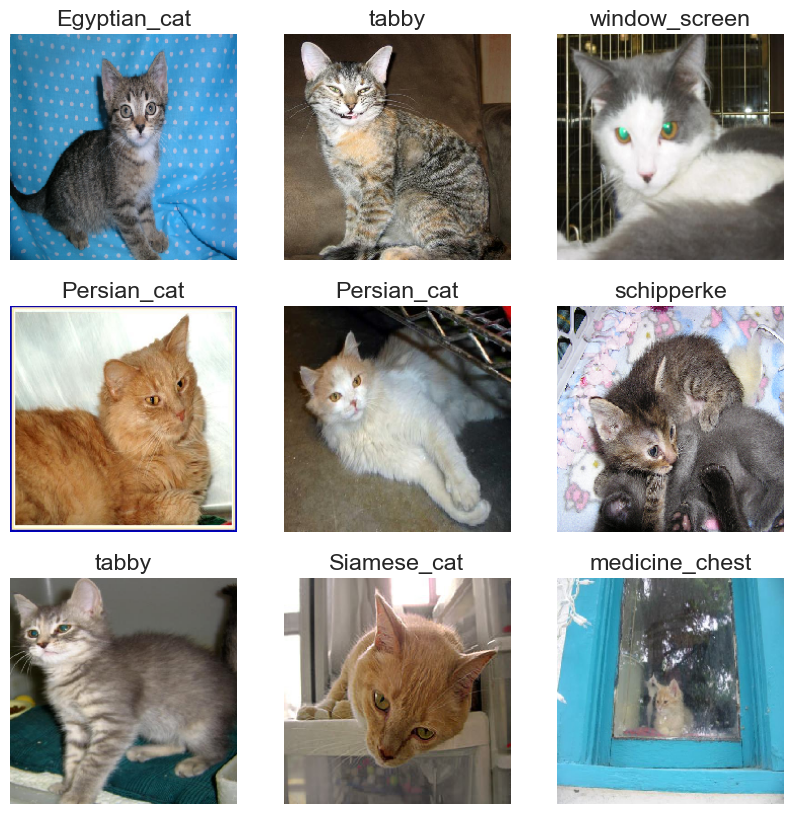

In [62]:
from keras.preprocessing import image

fnames = [
    os.path.join(test_dir + "/cats", fname)
    for fname in os.listdir(test_dir + "/cats")
]

plt.figure(figsize=(10, 10))
for i in range(9):
  img_path = fnames[i]
  img = image.load_img(img_path, target_size=(224, 224))

  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.array_to_img(x[0]))
  prediction = pretrained_resnet50.predict(x)[0]
  predicted_class = np.argmax(prediction, axis=0)
  predicted_label = label_mapping[predicted_class]

  plt.title(f"{predicted_label}")
  # plt.title(f"{predicted_lable}, {prediction}")
  plt.axis("off")

https://keras.io/api/applications/resnet/

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

https://medium.com/@kyan7472/these-are-the-5-best-pre-trained-neural-networks-23798e61a043


In [65]:
train_data_224 = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb"
)

validation_data_224 = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb"
)

Found 15995 files belonging to 2 classes.
Found 3706 files belonging to 2 classes.


In [ ]:
# finetune the ResNet
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
#from keras.optimizers import Adam
from keras.optimizers.legacy import Adam

num_classes = 1

# Load pretrained ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

model_finetuned = Model(inputs=base_model.input, outputs=predictions)

# Freeze some layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_finetuned.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 5
# Train the model
model_finetuned.fit(
    train_data_224,
    epochs=epochs,
    validation_data=validation_data_224
    # train_data,
    # epochs=epochs,
    # validation_data=validation_data
)

Epoch 1/5
184/500 [==========>...................] - ETA: 4:32 - loss: 0.1262 - accuracy: 0.4873

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


186/500 [==========>...................] - ETA: 4:30 - loss: 0.1250 - accuracy: 0.4887

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


242/500 [=============>................] - ETA: 3:41 - loss: 0.1118 - accuracy: 0.4902

276/500 [===============>..............] - ETA: 3:10 - loss: 0.1089 - accuracy: 0.4931

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


393/500 [======================>.......] - ETA: 1:32 - loss: 0.0988 - accuracy: 0.4966

In [64]:
train_data_224 = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb"
)

validation_data_224 = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb"
)

Found 15995 files belonging to 2 classes.
Found 3706 files belonging to 2 classes.


In [ ]:
# Optionally, fine-tuning by unfreezing some layers

"""
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

# Continue training
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    train_data,
    epochs=1,
    batch_size=32,
    validation_data=validation_data
)
"""

https://keras.io/examples/vision/yolov8/

https://github.com/onnx/models